**Building a CNN for the dataset**

Upload the dataset

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset
!ls

 94% 113M/121M [00:03<00:00, 49.4MB/s] 
100% 121M/121M [00:03<00:00, 39.9MB/s]
face-expression-recognition-dataset.zip  sample_data


In [ ]:
!unzip -o face-expression-recognition-dataset.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating:

In [ ]:
#Exploratory Data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
import os
import zipfile

zipfile.ZipFile('face-expression-recognition-dataset.zip').extractall()
os.listdir('./images/images/')

['train', 'validation']

In [ ]:
#Checking the details of the train and test data.

train_dir = './images/images/train/'
train_categories = set(os.listdir(train_dir))
validation_dir = './images/images/validation/'
test_categories = set(os.listdir(validation_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


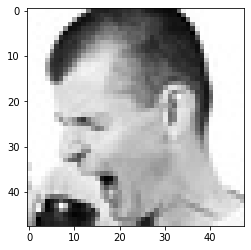

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

sample_dir = os.path.join(train_dir, 'angry')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

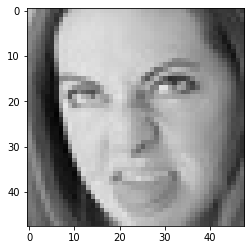

In [ ]:
sample_dir = os.path.join(train_dir, 'disgust')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

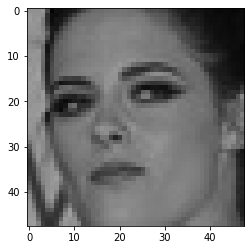

In [ ]:
sample_dir = os.path.join(train_dir, 'fear')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

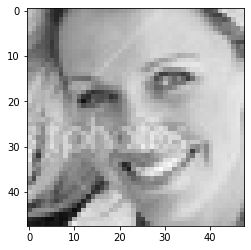

In [ ]:
sample_dir = os.path.join(train_dir, 'happy')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

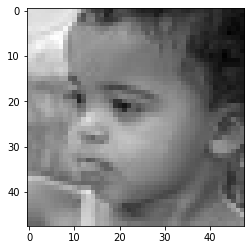

In [ ]:
sample_dir = os.path.join(train_dir, 'neutral')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

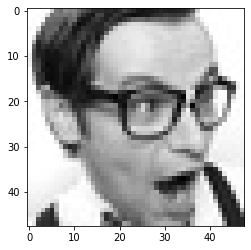

In [ ]:
sample_dir = os.path.join(train_dir, 'surprise')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

In [ ]:
img.min(), img.max()

(0, 255)

In [ ]:
import tensorflow as tf

train_dir = './images/images/train/'

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 28821 images belonging to 7 classes.


In [ ]:
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 0)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 1)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 2)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 3)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 4)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 5)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 6)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 7)[0][0]])

./images/images/train/angry/0.jpg
./images/images/train/disgust/10018.jpg
./images/images/train/fear/10010.jpg
./images/images/train/happy/100.jpg
./images/images/train/neutral/1000.jpg
./images/images/train/sad/10006.jpg
./images/images/train/surprise/10007.jpg


IndexError: ignored

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0